In [ ]:
# 목표 : 생선 품종 분류 모델
# 피쳐 : Weight, Length
# 타켓 : Species
# 유형 : 지도학습/분류

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

fishDF=pd.read_csv("../data/fish.csv",usecols=[0,1,2])

In [ ]:
fishDF.info()

In [ ]:
feature=fishDF[fishDF["Species"].isin(["Bream","Smelt"])].reset_index(drop=True)

In [ ]:
feature

In [ ]:
## Bream, Smelt 수치화
feature["Species"]=feature["Species"].map({"Bream":0,"Smelt":1})

In [ ]:
plt.scatter(feature["Weight"],feature["Length"],c=feature.Species)
plt.show()

In [ ]:
trainDF = feature.iloc[:round(feature.shape[0]*0.8)]
testDF = feature.iloc[round(feature.shape[0]*0.8):]

In [ ]:
trainDF.tail(3)

In [ ]:
testDF.tail(3)
# 이러면 형평성이 안맞다.... 

In [ ]:
# 내가 한 방식
# 학습용/테스트용 = 80 :20
# 데이터가 35,14개이므로 대충 40(32+8)개, 9(7+2)개로 나누자

bream=feature[feature["Species"]==0]
smelt=feature[feature["Species"]==1].reset_index(drop=True)
bream_train = bream.iloc[:round(bream.shape[0]*0.8)]
smelt_train = smelt.iloc[:round(smelt.shape[0]*0.8)]
bream_test = bream.iloc[round(bream.shape[0]*0.8):].reset_index(drop=True)
smelt_test= smelt.iloc[round(smelt.shape[0]*0.8):].reset_index(drop=True)
train=result = pd.concat([bream_train,smelt_train], ignore_index=True).reset_index(drop=True)
test=pd.concat([bream_test,smelt_test], ignore_index=True).reset_index(drop=True)

In [ ]:
# 임의의 데이터 생성
dataDF=pd.DataFrame({'kor':[10,20,30],
                     "math":[11,22,33],
                     "eng":[111,222,333]})
dataDF

In [ ]:
# dataDF.sample(n=1) 
# 1개의 샘플/표본 데이터 추출 -> 행이 뽑힌다!
for cnt in range(5):
    print(f"[{cnt}번]")
    print(dataDF.sample(n=1))

In [ ]:
# dataDF.sample(n=2) 
# 1개의 샘플/표본 데이터 추출 -> 행이 뽑힌다!
for cnt in range(5):
    print(f"[{cnt}번]")
    print(dataDF.sample(n=2, axis="columns"))

In [ ]:
# 비복원 추출 -> 복원 추출로 변경
for cnt in range(5):
    print(f"[{cnt}번]")
    print(dataDF.sample(n=2, axis="columns", replace=True))

In [ ]:
# 비복원 추출 -> 복원 추출로 변경
for cnt in range(5):
    print(f"[{cnt}번]")
    print(dataDF.sample(n=2, axis="columns", replace=True))

In [ ]:
twoFishDF=feature.sample(frac=1.)

In [ ]:
trainDF = twoFishDF.iloc[:round(twoFishDF.shape[0]*0.8)]
testDF = twoFishDF.iloc[round(twoFishDF.shape[0]*0.8):]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 먼저 feature와 target을 나눈다
featureDF=feature[feature.columns[1:]]
targetSR=feature.Species

print(f'featrueDF => {featureDF.shape}\n{featureDF.head(2)}')
print(f'targetSR => {targetSR.shape}\n{targetSR.head(2)}')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR)

In [ ]:
print(f'X_train : {X_train.shape}, Y_train : {Y_train.shape}')
print(f'X_test : {X_test.shape}, Y_test : {Y_test.shape}')

In [ ]:
Y_train # 75:25로 깔끔하게 나뉘었다 

In [ ]:
# 9:1로 해보자 
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.1)


In [134]:
# 비율설정 : target이 불균형 데이터인 경우 비율 지정
# stratify 매개변수 사용 
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR)
# 뭘 기준으로 할 지 정해준다
# 회귀분석을 할 때는 필요없지만, 분류를 할때는 stratify매개변수가 필요하다 

In [135]:
(Y_train==False).sum()

28

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR,
                                                    stratify=targetSR)

In [127]:
(Y_train==False).sum()

26

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.1)

In [131]:
(Y_train==False).sum()

32

In [ ]:
# test_size : 테스트 세트 비율
# stratify : 클래스 비율

In [136]:
#학습 진행
model=KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [137]:
print("classes_ : ",model.classes_) # y값 
print("feature_names_in_ : ",model.feature_names_in_) # x값
print("n_features_in_ : ",model.n_features_in_) # x개수 

classes_ :  [0 1]
feature_names_in_ :  ['Weight' 'Length']
n_features_in_ :  2


In [138]:
#검증
model.score(X_test,Y_test) # 100점

1.0

In [140]:
# 모델 활용 예측
new_data=pd.DataFrame([[21.8,17]], columns=model.feature_names_in_)
model.predict(X_test) 

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [143]:
import numpy as np
np.array(Y_test) # 결과가 똑같이 나옴을 확인할 수 있다 

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [147]:
# 타켓/클래스 비율 확인 가능 
Y_train.value_counts()/Y_train.shape[0]

Species
0    0.717949
1    0.282051
Name: count, dtype: float64

In [149]:
# 사용자가 전달한 테이터 검증 
new_data=pd.DataFrame([[160,25]], columns=model.feature_names_in_)
new_data

,Weight,Length
0,160,25


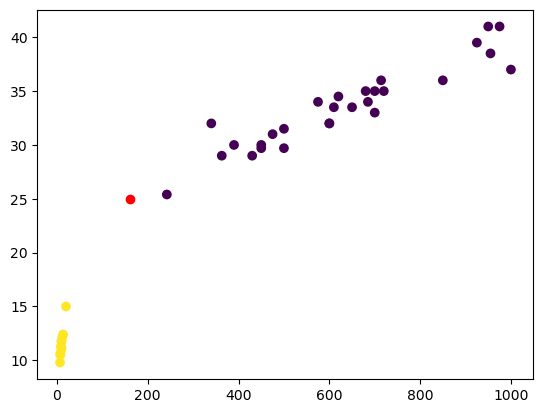

In [153]:
# 새로운 데이터와 학습 데이터의 시각화
plt.scatter(X_train.Weight, X_train.Length, c=Y_train, cmap='viridis')
plt.plot(new_data.Weight, new_data.Length,'ro')

In [154]:
model.predict(new_data)

array([1], dtype=int64)

In [160]:
model.kneighbors(new_data)[1][0]

2

In [158]:
X_train.reset_index(drop=True, inplace=True)
X_train

,Weight,Length
0,10.0,11.8
1,620.0,34.5
2,242.0,25.4
3,720.0,35.0
4,6.7,9.8
5,610.0,33.5
6,363.0,29.0
7,19.9,15.0
8,500.0,29.7
9,700.0,33.0


In [161]:
X_train.loc[model.kneighbors(new_data)[1][0]]

,Weight,Length
2,242.0,25.4
7,19.9,15.0
15,13.4,12.4
18,12.2,12.2
0,10.0,11.8


In [180]:
Y_train.reset_index(drop=True, inplace=True)

In [181]:
Y_train==0

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16    False
17     True
18    False
19     True
20     True
21     True
22    False
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30    False
31     True
32     True
33    False
34    False
35     True
36    False
37     True
38     True
Name: Species, dtype: bool

C:\Users\mathn\AppData\Local\Temp\ipykernel_19656\1342518031.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Bream.Weight, Bream.Length, c="khaki", cmap='viridis')
C:\Users\mathn\AppData\Local\Temp\ipykernel_19656\1342518031.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Smelt.Weight, Smelt.Length, c="black", cmap='viridis')


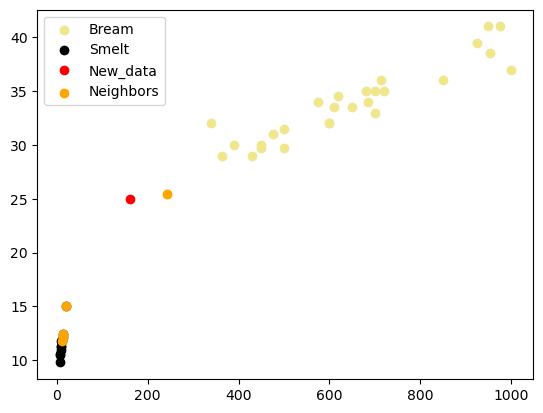

In [184]:
# 새로운 데이터와 학습 데이터의 시각화
Bream=X_train[Y_train==0]
Smelt=X_train[Y_train==1]
plt.scatter(Bream.Weight, Bream.Length, c="khaki", cmap='viridis')
plt.scatter(Smelt.Weight, Smelt.Length, c="black", cmap='viridis')
plt.plot(new_data.Weight, new_data.Length,'ro')

plt.scatter(X_train.loc[model.kneighbors(new_data)[1][0]]["Weight"],
            X_train.loc[model.kneighbors(new_data)[1][0]]["Length"],c="orange")
plt.legend(["Bream","Smelt","New_data","Neighbors"])
plt.show()


In [ ]:
# 값의 범위가 달라서 Smelt쪽에 치우쳐진다
# 실제로 비슷한 건 Bream인데...
# => 표준화가 필요하다 (feature scaling)